In [2]:
#titanic survival prediction

In [3]:
# Use the Titanic dataset to build a model that predicts whether a
# passenger on the Titanic survived or not. This is a classic beginner
# project with readily available data.
# The dataset typically used for this project contains information
# about individual passengers, such as their age, gender, ticket
# class, fare, cabin, and whether or not they survived.

In [4]:
#necessary imports

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Find average, min, max values of all numeric columns

In [10]:
df_num=df.select_dtypes(exclude='object')
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
#axis=0 --> columns
#axis=1---> rows

In [11]:
print("Mean/Average of all numeric columns:")
print(df_num.mean(axis = 0))
print()
print("Minimum of all numeric columns:")
print(df_num.min(axis = 0))
print()
print("Maximum of all numeric columns:")
print(df_num.max(axis = 0))

Mean/Average of all numeric columns:
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

Minimum of all numeric columns:
PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

Maximum of all numeric columns:
PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [13]:
# Find average, min, max values of all numeric rows

In [12]:
print("Mean/Average of all numeric rows:")
print(df_num.mean(axis = 1))
print()
print("Minimum of all numeric rows:")
print(df_num.min(axis = 1))
print()
print("Maximum of all numeric rows:")
print(df_num.max(axis = 1))

Mean/Average of all numeric rows:
0        4.892857
1       16.326186
2        5.846429
3       13.585714
4        7.292857
          ...    
886    132.714286
887    134.142857
888    153.075000
889    135.428571
890    133.392857
Length: 891, dtype: float64

Minimum of all numeric rows:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Length: 891, dtype: float64

Maximum of all numeric rows:
0       22.0000
1       71.2833
2       26.0000
3       53.1000
4       35.0000
         ...   
886    887.0000
887    888.0000
888    889.0000
889    890.0000
890    891.0000
Length: 891, dtype: float64


In [15]:
# Find number of missing values of each column

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Find the unique values of each column

In [14]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print()

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [20]:
#finding missing values and performing imputation on them

In [15]:
#find
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [22]:
#we find that there are 3 columns which have null values

In [16]:
#for age we will replace the missing values with the mean value of age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [24]:
#for embarked column there are two missing values we will replace it with 'C'

In [17]:
df['Embarked']=df['Embarked'].fillna('C')

In [26]:
#for cabion column we will drop the missing values as it is a categorical column and is difficult to determine

In [18]:
df.drop('Cabin', inplace=True, axis=1)

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(891, 11)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [22]:
#categorical features need to be encoded

In [24]:
Embarked=pd.get_dummies(df['Embarked'], drop_first=True)
Sex=pd.get_dummies(df['Sex'], drop_first=True)
df.drop(['Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True)
df=pd.concat([df, Sex, Embarked], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [25]:
df.shape

(891, 10)

In [26]:
#visualization

In [27]:
numeric_columns=list(df.select_dtypes(exclude='object').columns)

In [28]:
def calculate_row_num(col_num, len_num):
    rem = len_num%col_num
    if (rem) == 0:
        row_num = len_num // col_num
    elif (rem) != 0:
        row_num = (len_num + col_num - rem) // col_num
    if len_num == col_num:
        return row_num + 1
    return row_num

def plot_univariate_subplots(df,
                             col_num,
                             plot_type,
                             figsize = (30,30),
                             color_hue = None,
                             log_scale = False,
                             wspace = 0.25,
                             hspace = 0.6,
                             numeric_columns = numeric_columns
                             ):
    len_num = len(numeric_columns)
    row_num = calculate_row_num(col_num, len_num)
    fig, axes = plt.subplots(row_num, col_num, figsize=figsize)
    index = 0

    if plot_type == 'boxplot':
        graph_plot = lambda plot_type: sns.boxplot(data=df,
                                                   x=numeric_columns[index],
                                                   ax=axes[row,col],
                                                   color = color_hue)
    elif plot_type == 'kde':
        graph_plot = lambda plot_type: sns.kdeplot(data=df,
                                                   x=numeric_columns[index],
                                                   log_scale = log_scale,
                                                   ax=axes[row,col],
                                                   hue = color_hue,
                                                   bw_adjust=.30)
    elif plot_type == 'hist':
         graph_plot = lambda plot_type: sns.histplot(data=df,
                                                     x=numeric_columns[index],
                                                     log_scale = log_scale,
                                                     multiple = 'stack',
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    elif plot_type == 'count':
        graph_plot = lambda plot_type: sns.countplot(data = df,
                                                     x=numeric_columns[index],
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    for row in range(row_num):
        for col in range(col_num):
            if index>=len(numeric_columns):
                axes[row,col].set_axis_off()
            if index<len(numeric_columns):
                graph_plot(plot_type)
            index = index + 1
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

In [29]:
#boxplots

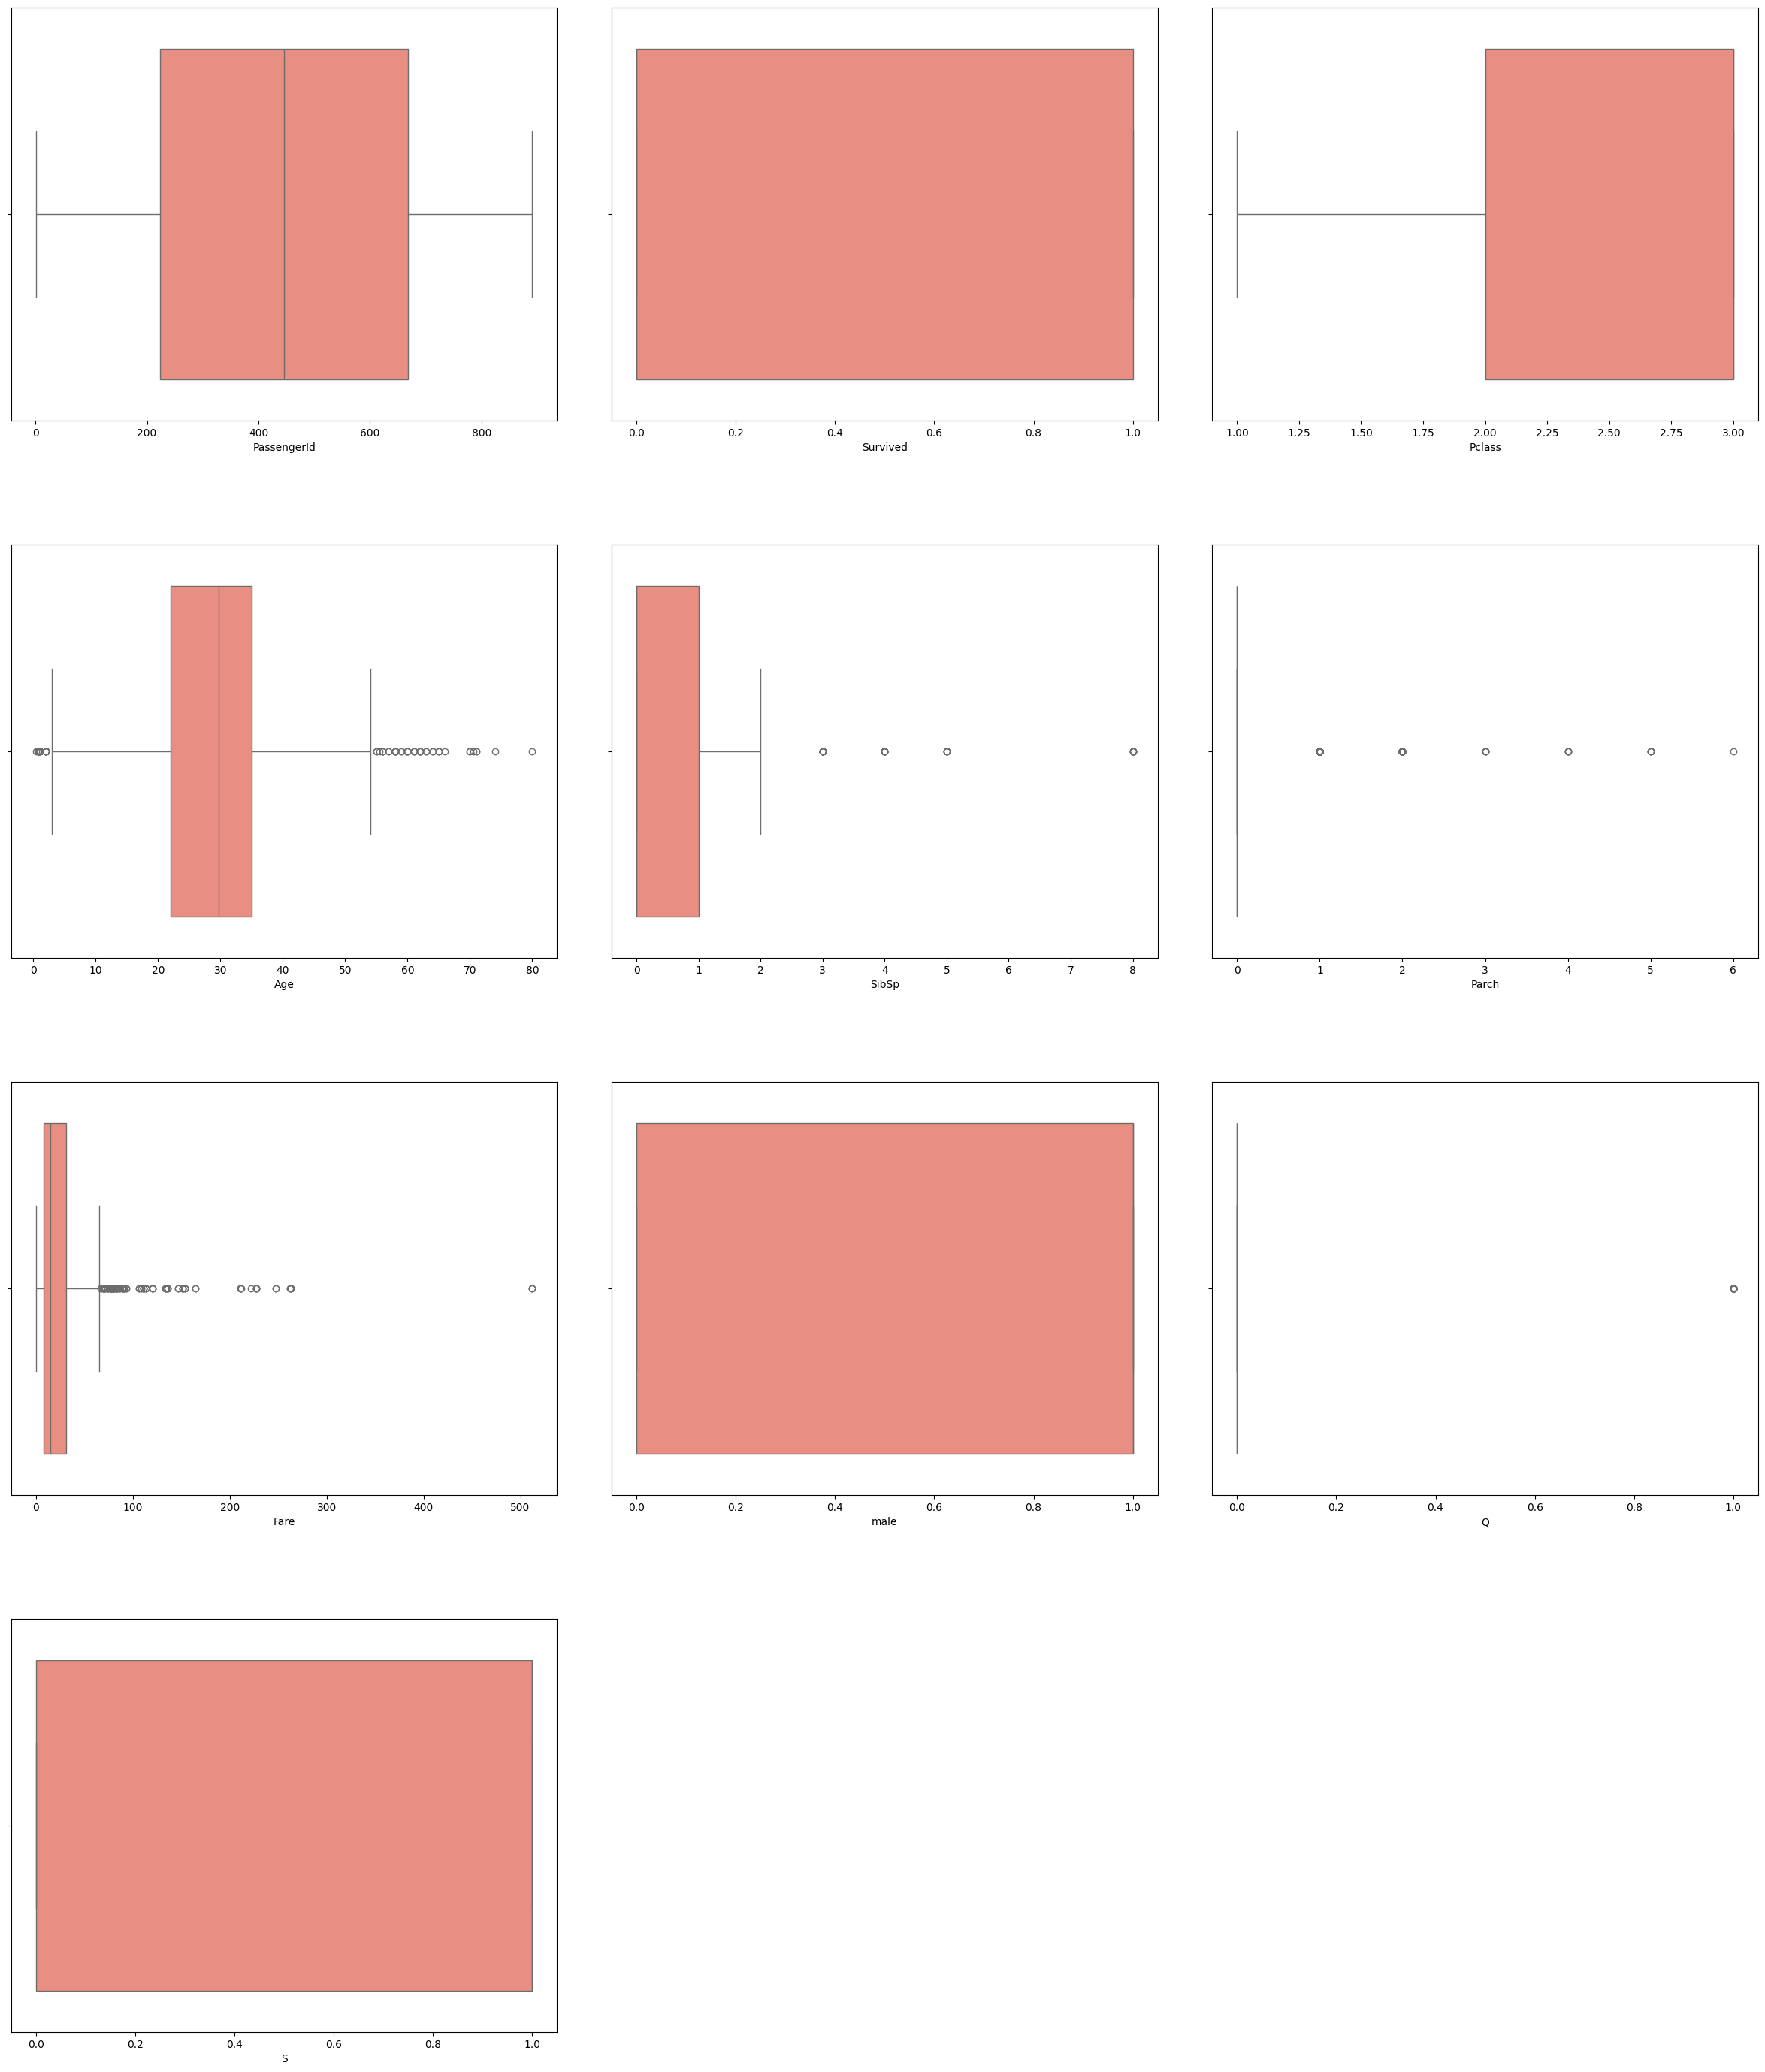

In [30]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'boxplot',
                         figsize = (30,35),
                         color_hue = 'salmon',
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = numeric_columns)

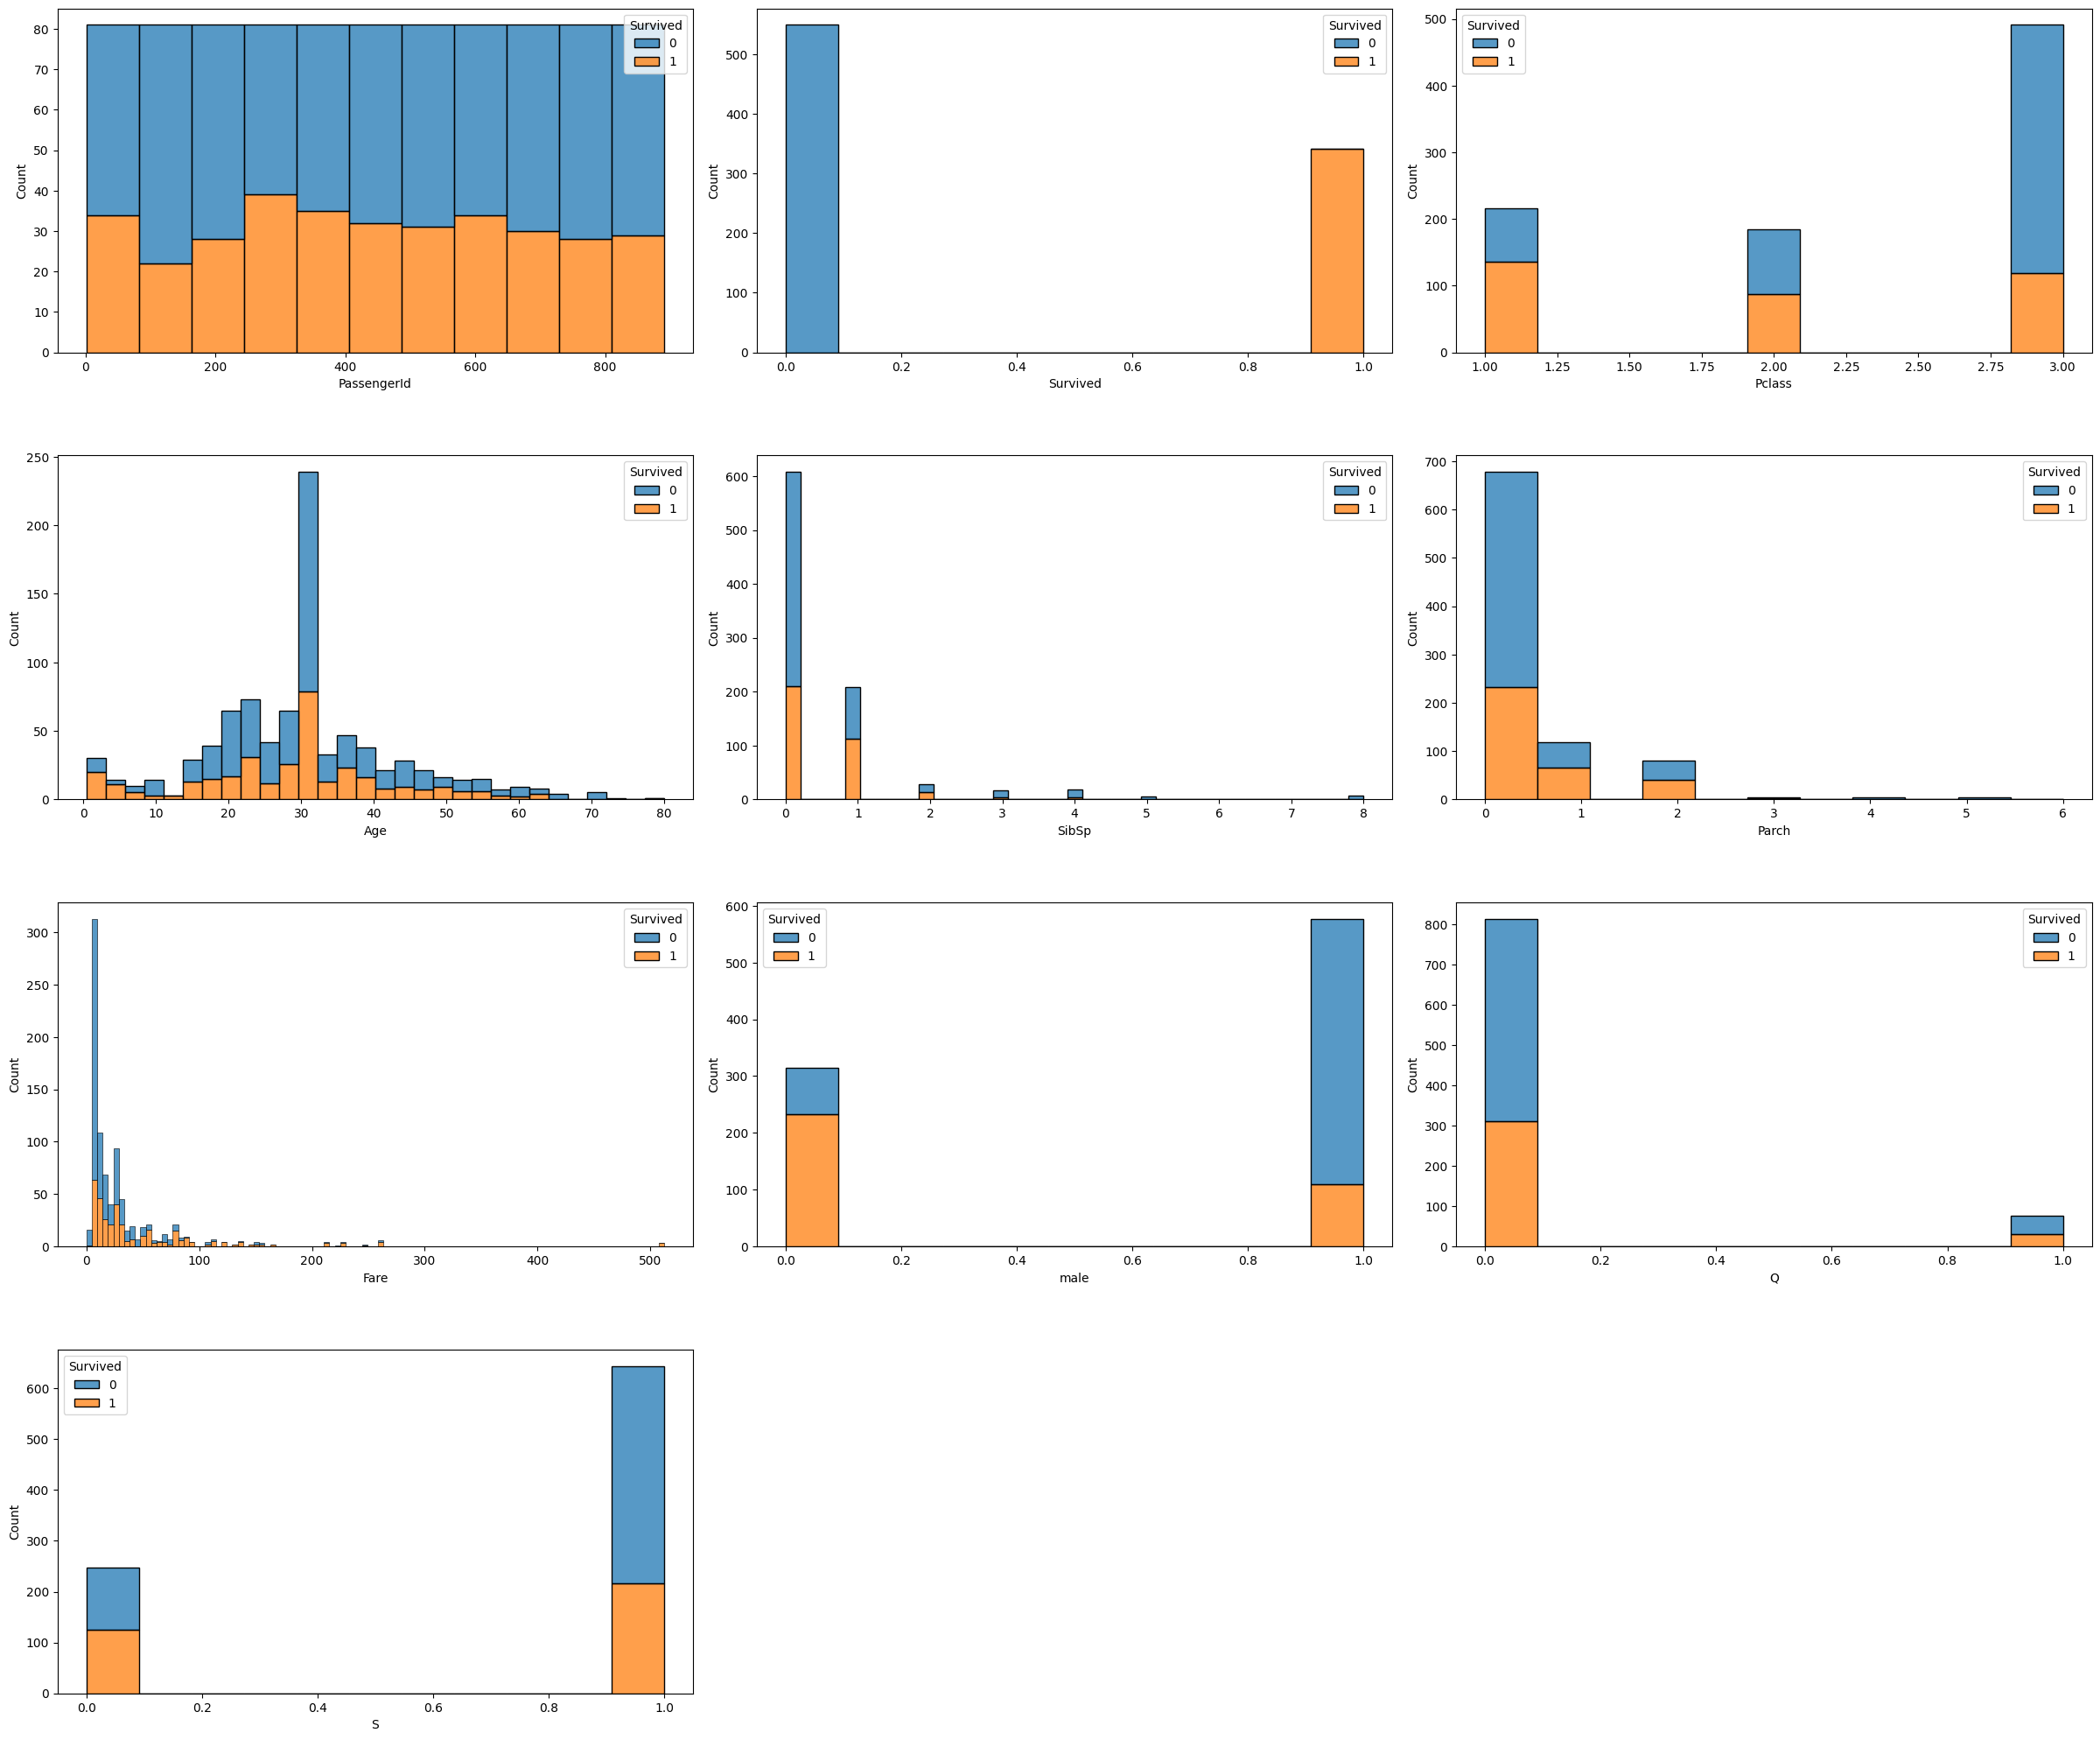

In [38]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'hist',
                         figsize = (30,25),
                         color_hue = 'Survived',
                         log_scale = False,
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = numeric_columns)

In [35]:
#pre processing

In [39]:
le = LabelEncoder()
df['male'] = le.fit_transform(df['male'])
df['Q'] = le.fit_transform(df['Q'])
df['S'] = le.fit_transform(df['S'])
sc = MinMaxScaler()
df['Fare'] = sc.fit_transform(df['Fare'].values.reshape(-1, 1))

In [46]:
#logistic regression model

In [47]:
x = df.drop((['Survived' , 'PassengerId']) , axis = 1)
y = df['Survived']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 ,random_state=42)

In [49]:
model_logistic = LogisticRegression()

In [50]:
model_logistic.fit(x_train,y_train)

LogisticRegression()

In [51]:
model_logistic.score(x_train,y_train)

0.8023952095808383

In [52]:
model_logistic.score(x_test,y_test)

0.8026905829596412

In [53]:
y_pred=model_logistic.predict(x_test)

In [54]:
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[114,  20],
       [ 24,  65]])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.76      0.73      0.75        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [56]:
#random forest

In [57]:
model_random=RandomForestClassifier()

In [58]:
model_random.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
model_random.score(x_train, y_train)

0.9820359281437125

In [60]:
model_random.score(x_test, y_test)

0.7892376681614349